# Import Libraries

In [1]:
from astropy.io import fits as pyfits # To read FITS files
from astropy.time import Time

import os # To use Linux OS commands

import sys # For system commands

import matplotlib.pyplot as plt # For graphing capabilities
import matplotlib.cm as cm # For colourmap

import seaborn as sns

import numpy as np # To handle data with numpy arrays

# Load Files

In [2]:
def load_file(filename):
    """
    Load the given FITS file, extract all valuable information and save it
    within a dictionary.
    """
    hdulist = pyfits.open(filename)
    spectrum = {'Vlsr' : hdulist[2].data['Vlsr'], # Local Standard of Rest Velocity >> NECESSARY
                'LCP'  : hdulist[2].data['Polstate1'], # LCP Radiation Counts >> NECESSARY
                'RCP'  : hdulist[2].data['Polstate4'], # RCP Radiation Counts >> NECESSARY
                'units' : hdulist[2].header['TUNIT2'],
                'pointing' : hdulist[0].header['SPPOINT'], # Pointing Offset
                'position' : hdulist[2].header['POSITION'], 
                'HPBW' : hdulist[1].header['HPBW'], # Half Power Beam Width >> NECESSARY
                'date' : hdulist[0].header['DATE-OBS'],
                'object' : hdulist[0].header['OBJECT'],
                'longitude' : hdulist[0].header['LONGITUD'],
                'latitude' : hdulist[0].header['LATITUDE'],
                'equinox' : hdulist[0].header['EQUINOX'],
                'bw' : hdulist[0].header['SPBW'], # Spectrometer Bandwidth
                'nchan' : hdulist[0].header['SPCHAN'], # Number of Spectrometer Channels
                't_int' : hdulist[0].header['SPTIME'],
                'fs_offset' : hdulist[0].header['SPFS'],
                'spVlsr' : hdulist[0].header['SPVLSR'], # Centre VLSR
                'restfreq' : hdulist[0].header['RESTFREQ'], # Rest Frequency
                'centrefreq' : hdulist[2].header['CENTFREQ'], # Centre Frequency
                'Tsys_lcp' : hdulist[3].header['TSYS1'], # System Temperature LCP
                'DTsys_lcp' : hdulist[3].header['TSYSERR1'], # System Temp Error
                'Tsys_rcp' : hdulist[3].header['TSYS2'], # System Temperature RCP
                'DTsys_rcp': hdulist[3].header['TSYSERR2'] } # System Temp Error
    
    return hdulist, spectrum

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5E5C-FB82

 Directory of C:\Users\Clinton\Desktop\Observational_Assignments\Report I (Radio)\Code

2023/04/23  04:50 PM    <DIR>          .
2023/04/23  04:50 PM    <DIR>          ..
2023/04/23  01:31 PM    <DIR>          .ipynb_checkpoints
2020/04/15  11:00 AM           132ÿ480 2020d105_23h24m12s_Spec_sharmila_G331.13-0.24.fits
2020/04/15  11:00 AM           132ÿ480 2020d105_23h29m52s_Spec_sharmila_G331.13-0.24.fits
2020/04/15  11:00 AM           132ÿ480 2020d105_23h54m37s_Spec_sharmila_G331.13-0.24.fits
2020/04/15  11:00 AM           132ÿ480 2020d106_00h00m17s_Spec_sharmila_G331.13-0.24.fits
2023/04/23  01:31 PM    <DIR>          Data
2020/05/30  11:25 AM            81ÿ773 Galactic Coordinates.ipynb
2023/04/23  01:31 PM    <DIR>          Kat
2023/04/23  04:50 PM            45ÿ362 Maser_Data_Reduction_G331.ipynb
2020/05/29  12:53 PM            32ÿ786 Maser_G323_Pointing_Correction.ipynb
2023/04/23  04:49 PM         1ÿ078ÿ663 Ras

In [4]:
maser_file_1 = r'2020d105_23h24m12s_Spec_sharmila_G331.13-0.24.fits'
maser_file_2 = r'2020d105_23h29m52s_Spec_sharmila_G331.13-0.24.fits'
maser_file_3 = r'2020d105_23h54m37s_Spec_sharmila_G331.13-0.24.fits'
maser_file_4 = r'2020d106_00h00m17s_Spec_sharmila_G331.13-0.24.fits'

hdulist_1, spectrum_1 = load_file(maser_file_1)
hdulist_2, spectrum_2 = load_file(maser_file_2)
hdulist_3, spectrum_3 = load_file(maser_file_3)
hdulist_4, spectrum_4 = load_file(maser_file_4)

In [5]:
hdulist_1[0].header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2020-04-14T23:24:12' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G331.13-0.24'       / Name of object                                 
LONGITUD=              241.795 / Longitude of object                            
LATITUDE=    -51.7080555555556 / Latitude of object                             
COORDSYS= 'EQUATORIAL'         / Input coordinate system                        
EQUINOX =                1950. / Input coordinate equinox                       
RADECSYS= 'ICRS    '           / Input reference frame                          
COMMENT information about th

In [6]:
spectrum_1['pointing']

0

## 1st Maser Scan Information

In [7]:
hdulist_1[0].header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2020-04-14T23:24:12' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G331.13-0.24'       / Name of object                                 
LONGITUD=              241.795 / Longitude of object                            
LATITUDE=    -51.7080555555556 / Latitude of object                             
COORDSYS= 'EQUATORIAL'         / Input coordinate system                        
EQUINOX =                1950. / Input coordinate equinox                       
RADECSYS= 'ICRS    '           / Input reference frame                          
COMMENT information about th

In [8]:
hdulist_1[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   87 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
EXTNAME = '04.5S   '           / name of this binary table extension            
FEEDTYPE= 'Diagonal'           / Feedtype                                       
BMOFFHA =                -0.51 / Beam offset in HA                              
BMOFFDEC=               -0.021 / Beam offset in Dec                             
HPBW    =                0.1

In [9]:
hdulist_1[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1025 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Spectra '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   1. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

In [10]:
hdulist_1[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Chart   '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   4. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

## 2nd Maser Scan Information

In [11]:
hdulist_2[0].header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2020-04-14T23:29:52' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G331.13-0.24'       / Name of object                                 
LONGITUD=              241.795 / Longitude of object                            
LATITUDE=    -51.7080555555556 / Latitude of object                             
COORDSYS= 'EQUATORIAL'         / Input coordinate system                        
EQUINOX =                1950. / Input coordinate equinox                       
RADECSYS= 'ICRS    '           / Input reference frame                          
COMMENT information about th

In [12]:
hdulist_2[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   87 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
EXTNAME = '04.5S   '           / name of this binary table extension            
FEEDTYPE= 'Diagonal'           / Feedtype                                       
BMOFFHA =                -0.51 / Beam offset in HA                              
BMOFFDEC=               -0.021 / Beam offset in Dec                             
HPBW    =                0.1

In [13]:
hdulist_2[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1025 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Spectra '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   1. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

In [14]:
hdulist_2[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Chart   '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   4. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

## 3rd Maser Scan Information

In [15]:
hdulist_3[0].header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2020-04-14T23:54:37' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G331.13-0.24'       / Name of object                                 
LONGITUD=              241.795 / Longitude of object                            
LATITUDE=    -51.7080555555556 / Latitude of object                             
COORDSYS= 'EQUATORIAL'         / Input coordinate system                        
EQUINOX =                1950. / Input coordinate equinox                       
RADECSYS= 'ICRS    '           / Input reference frame                          
COMMENT information about th

In [16]:
hdulist_3[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   87 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
EXTNAME = '04.5S   '           / name of this binary table extension            
FEEDTYPE= 'Diagonal'           / Feedtype                                       
BMOFFHA =                -0.51 / Beam offset in HA                              
BMOFFDEC=               -0.021 / Beam offset in Dec                             
HPBW    =                0.1

In [17]:
hdulist_3[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1025 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Spectra '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   1. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

In [18]:
hdulist_3[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Chart   '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   4. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

## 4th Maser Scan Information

In [19]:
hdulist_4[0].header

SIMPLE  =                    T                                                  
BITPIX  =                    8                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T                                                  
DATE    = '2020-04-15T00:00:17' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
COMMENT information about the object, from scheduler task                       
OBJECT  = 'G331.13-0.24'       / Name of object                                 
LONGITUD=              241.795 / Longitude of object                            
LATITUDE=    -51.7080555555556 / Latitude of object                             
COORDSYS= 'EQUATORIAL'         / Input coordinate system                        
EQUINOX =                1950. / Input coordinate equinox                       
RADECSYS= 'ICRS    '           / Input reference frame                          
COMMENT information about th

In [20]:
hdulist_4[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   87 / width of table in bytes                        
NAXIS2  =                    1 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
EXTNAME = '04.5S   '           / name of this binary table extension            
FEEDTYPE= 'Diagonal'           / Feedtype                                       
BMOFFHA =                -0.51 / Beam offset in HA                              
BMOFFDEC=               -0.021 / Beam offset in Dec                             
HPBW    =                0.1

In [21]:
hdulist_4[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   12 / width of table in bytes                        
NAXIS2  =                 1025 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Spectra '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   1. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

In [22]:
hdulist_4[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3874 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
EXTNAME = 'Chart   '           / name of this binary table extension            
FRONTEND= '04.5S   '           / Frontend ID                                    
CENTFREQ=             6668.018 / [MHz] Backend centre frequency                 
BANDWDTH=                   4. / [MHz] Bandwidth of backend                     
TCAL1   =                 14

# Define Methods

In [23]:
def plot_spectrum(spectrum, unit):
    
    # Create Figure
    plt.figure(figsize = (12,4))
    
    # Plot LCP & RCP
    plt.plot(spectrum['Vlsr'], spectrum['LCP'], label='LCP', color = 'orangered', alpha = 0.75)
    plt.plot(spectrum['Vlsr'], spectrum['RCP'], label='RCP', color = 'darkblue', alpha = 0.75)
    
    # Add Legend & Grid
    plt.legend()
    plt.grid(True)
    
    # Add Title & Lables
    plt.title(spectrum['object'] + ' ' + spectrum['date'])
    plt.xlabel(r'$V_{lsr}$ (km/s)')
    if unit == 'Kelvin':
        plt.ylabel('Temperature (K)')
    if unit == 'Jansky':
        plt.ylabel('Flux Density (Jy)')
    plt.axis('tight')
    
    # Show Figure
    plt.show()
    
    return None

In [24]:
def LCP_Overlap_Plot(spectrum_1, spectrum_2):
    
    LCP_1 = spectrum_1['LCP'] - spectrum_2['LCP']
    LCP_2 = spectrum_2['LCP'] - spectrum_1['LCP']

    plt.figure(figsize=[15,5])
    plt.plot(spectrum_1['Vlsr'], LCP_1, color='orangered', linewidth=1.5, alpha=0.5) #make lines semi-transparent
    plt.plot(spectrum_2['Vlsr'], LCP_2, color='darkred', linewidth=1.5, alpha=0.5)
    lim=plt.axis('tight')
    plt.xlabel('V_lsr (km/s)')
    plt.ylabel('Temperature (K)')
    plt.grid(True)
    
    return None

In [25]:
def RCP_Overlap_Plot(spectrum_1, spectrum_2):
    
    RCP_1 = spectrum_1['RCP'] - spectrum_2['RCP']
    RCP_2 = spectrum_2['RCP'] - spectrum_1['RCP']

    plt.figure(figsize=[12,4])
    plt.plot(spectrum_1['Vlsr'], RCP_1, color='darkblue', linewidth=1.5, alpha=0.75) #make lines semi-transparent
    plt.plot(spectrum_2['Vlsr'], RCP_2, color='royalblue', linewidth=1.5, alpha=0.75)
    lim=plt.axis('tight')
    plt.xlabel('V_lsr (km/s)')
    plt.ylabel('Temperature (K)')
    plt.grid(True)
    
    return None

In [26]:
def frequency_switch(spectrum_1, spectrum_2):
    """
    Corrects the bandpass response using frequency-switching and
    return the spectra over a common range.
    
    Input: 
    spectrum_1 : 1st observation of frequency-switched pair
    spectrum_2 : 2nd observation of frequency-switched pair
    
    Output:
    new_spectrum_1: Bandpass-corrected frequency range
    new_spectrum_2: Bandpass-corrected frequency range
    
    """
    
    VLSR_1 = spectrum_1['Vlsr']
    VLSR_2 = spectrum_2['Vlsr']
    
    # Subtract the Reference Spectrum from the Original Signal
    LCP_1 = spectrum_1['LCP'] - spectrum_2['LCP']
    LCP_2 = spectrum_2['LCP'] - spectrum_1['LCP']
    RCP_1 = spectrum_1['RCP'] - spectrum_2['RCP']
    RCP_2 = spectrum_2['RCP'] - spectrum_1['RCP']
    
    # Find the common velocities from the two spectra
    spectrum_1_common = np.nonzero(np.in1d(spectrum_1['Vlsr'], spectrum_2['Vlsr']))
    spectrum_2_common = np.nonzero(np.in1d(spectrum_2['Vlsr'], spectrum_1['Vlsr']))
    
    # Copy Spectra to keep Header Information
    new_spectrum_1 = spectrum_1.copy()
    new_spectrum_2 = spectrum_2.copy()
    
    # Insert in the New Spectra Data
    new_spectrum_1['Vlsr'] = spectrum_1['Vlsr'][spectrum_1_common]
    new_spectrum_1['LCP'] = LCP_1[spectrum_1_common]
    new_spectrum_1['RCP'] = RCP_1[spectrum_1_common]
    
    new_spectrum_2['Vlsr'] = spectrum_2['Vlsr'][spectrum_2_common]
    new_spectrum_2['LCP'] = LCP_2[spectrum_2_common]
    new_spectrum_2['RCP'] = RCP_2[spectrum_2_common]
    
    Vlsr_min = np.min(new_spectrum_1['Vlsr'])
    Vlsr_max = np.max(new_spectrum_1['Vlsr'])
    Vlsr_1 = new_spectrum_1['Vlsr']
    Vlsr_2 = new_spectrum_2['Vlsr']
    
    # Get rid of correlator artifiact
    new_spectrum_1['Vlsr'] = new_spectrum_1['Vlsr'][(Vlsr_1 > (Vlsr_min+1)) & (Vlsr_1 < (Vlsr_max-1))]
    new_spectrum_1['LCP'] = new_spectrum_1['LCP'][(Vlsr_1 > (Vlsr_min+1)) & (Vlsr_1 < (Vlsr_max-1))]
    new_spectrum_1['RCP'] = new_spectrum_1['RCP'][(Vlsr_1 > (Vlsr_min+1)) & (Vlsr_1 < (Vlsr_max-1))]
    
    new_spectrum_2['Vlsr'] = new_spectrum_2['Vlsr'][(Vlsr_2 > (Vlsr_min+1)) & (Vlsr_2 < (Vlsr_max-1))]
    new_spectrum_2['LCP'] = new_spectrum_2['LCP'][(Vlsr_2 > (Vlsr_min+1)) & (Vlsr_2 < (Vlsr_max-1))]
    new_spectrum_2['RCP'] = new_spectrum_2['RCP'][(Vlsr_2 > (Vlsr_min+1)) & (Vlsr_2 < (Vlsr_max-1))]
    
    # Plot LCP Spectra
    # -------------------------
    
    # Create Figure
    plt.figure(figsize = (12,4))
    
    plt.plot(VLSR_1, LCP_1, label='LCP First Obsevation', color = 'orangered', alpha = 0.75)
    plt.plot(VLSR_2, LCP_2, label='LCP Second Observation', color = 'darkred', alpha = 0.75)
    
    # Add Legend & Grid
    plt.legend(loc = 'upper right')
    plt.grid(True)
    
    # Add Title & Lables
    plt.xlabel('V_lsr (km/s)')
    plt.ylabel('Temperature (K)')
    plt.axis('tight')
    
    # Show Figure
    plt.show()
    
    # Plot RCP Spectra
    # -------------------------
    
    # Create Figure
    plt.figure(figsize = (12,6))
    
    plt.plot(VLSR_1, RCP_1, label='RCP First Obsevation', color = 'darkblue', alpha = 0.75)
    plt.plot(VLSR_2, RCP_2, label='RCP Second Observation', color = 'royalblue', alpha = 0.75)
    
    # Add Legend & Grid
    plt.legend(loc = 'upper right')
    plt.grid(True)
    
    # Add Title & Lables
    plt.xlabel('V_lsr (km/s)')
    plt.ylabel('Temperature (K)')
    plt.axis('tight')
    
    # Show Figure
    plt.show()
    
    return new_spectrum_1, new_spectrum_2

In [27]:
def baseline_subtraction(VLSR, temperature, line_range, plot_colour, title):
    
    """
    Remove residual baseline variation after frequency-swithcing.
    
    Input:
        VLSR: array of velocity values
        temperature: array of temperature as a function of velocity
        line_range: two-element array with start and end velocity of line emission.
        
    The line emmission range is masked before a fit is performed on the baseline.
    
    Returns: Corrected amplitude
    
    To do:  generalise mask to use multiple line ranges.
    """
    
    line = np.where(np.logical_and(VLSR>=line_range[0], VLSR<=line_range[1]))
    mask = np.zeros(len(temperature))
    mask[line] = 1
    velocity_mask = np.ma.array(VLSR, mask = mask)
    temperature_mask = np.ma.array(temperature, mask = mask)

    #In general, we have found that a third-order polynomial is sufficient to fit the spectral baseline
    p = np.poly1d(np.ma.polyfit(velocity_mask, temperature_mask, 3))
    basefit = p(VLSR)

    plt.figure(figsize = [15,5])
    plt.plot(VLSR, temperature, color = plot_colour, linestyle = '-', alpha = 0.5, label = title)
    plt.plot(velocity_mask, temperature_mask, color = 'black', linestyle = '--', label = 'Data used for Fitting the Baseline', alpha = 1)
    plt.plot(VLSR, basefit, color = 'limegreen', linewidth = 2, linestyle = '-', alpha = 1, label = 'Baseline Fitting Polynomial')
    lim = plt.axis('tight')
    plt.grid()
    plt.legend()
    plt.ylabel('Temperature (K)')
    plt.xlabel('Vlsr')

    temperature = temperature - basefit
    
    plt.figure(figsize = [15,5])
    plt.plot(VLSR, temperature, color = plot_colour, alpha = 0.75, label = title + ' (After Baseline Subtraction)')
    lim = plt.axis('tight')
    plt.grid()
    plt.legend()
    plt.ylabel('Temperature (K)')
    plt.xlabel('Vlsr')
    
    return temperature

In [28]:
def time_averaged_spectrum(spec1, spec2):
    """
    Average two spectra in time.
    Return a new spectrum.
    """
    
    #find mean of the corrected spectra
    mean_lcp = np.mean(np.vstack([spec1['LCP'], spec2['LCP']]), axis=0)
    mean_rcp = np.mean(np.vstack([spec1['RCP'], spec2['RCP']]), axis=0)
    
    #find mid point between times of observation
    time1 = Time(spec1['date'], scale='utc', format='isot')
    time2 = Time(spec2['date'], scale='utc', format='isot')
    dt = (time2 - time1)/2
    mid_time = time1 +dt
    
    #construct new spectrum
    mean_spec = {'object' : spec1['object'],
                 'longitude' : spec1['longitude'],
                 'latitude' : spec1['latitude'],
                 'equinox' : spec1['equinox'],
                 'HPBW' : spec1['HPBW'],
                 'date' : mid_time.iso,    
                 'Vlsr' : spec1['Vlsr'],
                 'LCP' : mean_lcp,
                 'RCP' : mean_rcp,
                 'Tsys_lcp' : np.mean([spec1['Tsys_lcp'], spec2['Tsys_lcp']]),
                 'DTsys_lcp' : np.mean([spec1['DTsys_lcp'], spec2['DTsys_lcp']]) ,
                 'Tsys_rcp' : np.mean([spec1['Tsys_rcp'], spec2['Tsys_rcp']]),
                 'DTsys_rcp': np.mean([spec1['DTsys_rcp'], spec2['DTsys_rcp']])}
    return mean_spec

# 1st FS Pair Data Reduction

## Step 1: Plot Spectra

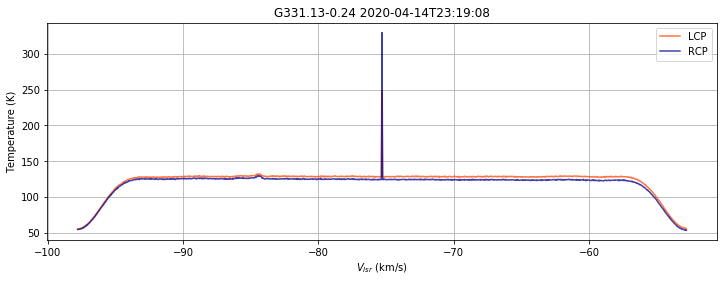

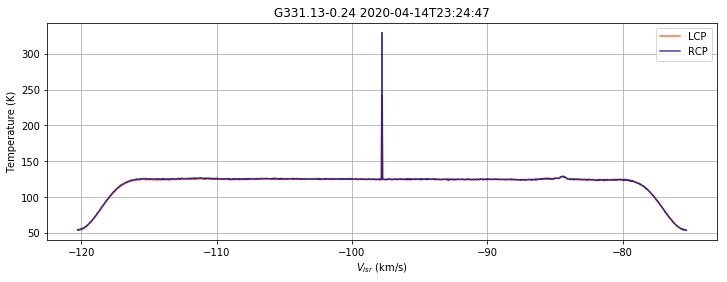

In [29]:
plot_spectrum(spectrum_1, 'Kelvin')
plot_spectrum(spectrum_2, 'Kelvin')

## Step 2: Bandpass Correction Via Frequency Switching

### Step 2 A: Find Where the Pair Overlaps

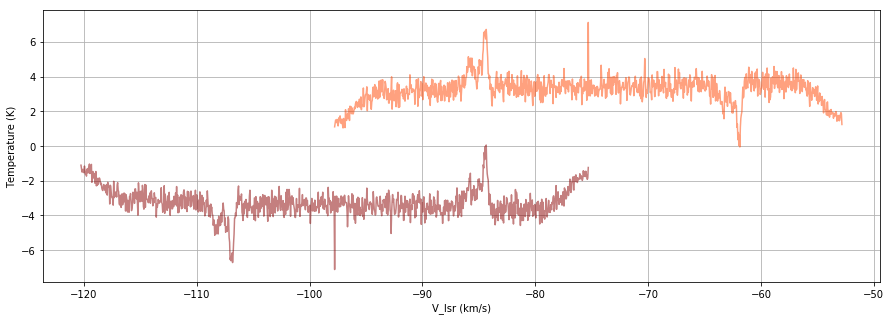

In [30]:
LCP_Overlap_Plot(spectrum_1, spectrum_2)

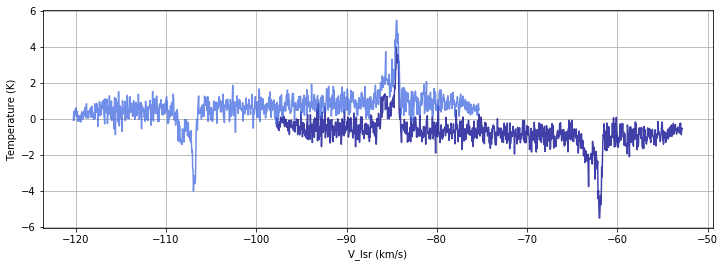

In [31]:
RCP_Overlap_Plot(spectrum_1, spectrum_2)

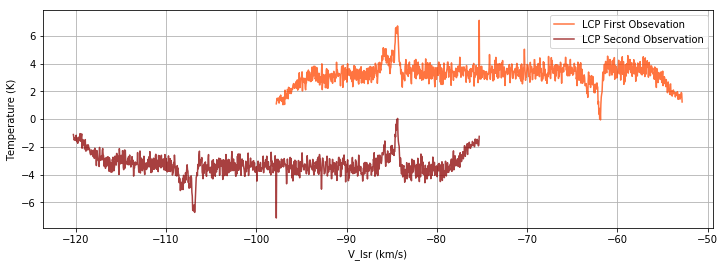

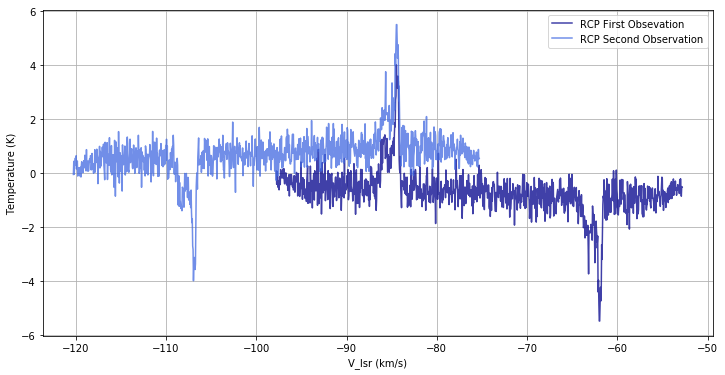

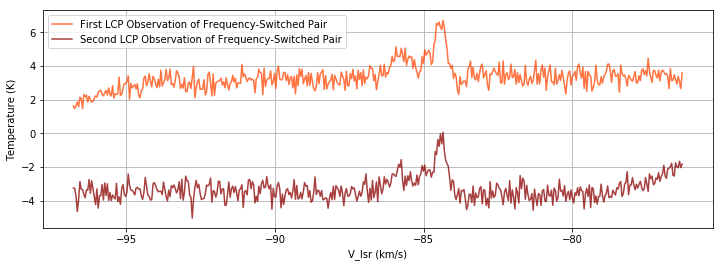

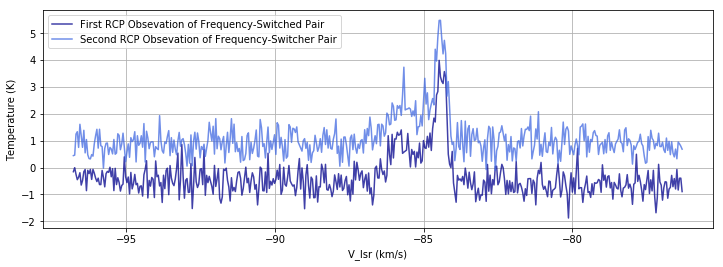

In [32]:
new_spectrum_1, new_spectrum_2 = frequency_switch(spectrum_1, spectrum_2)

# Plot LCP Spectra Overlap
# -------------------------

# Create Figure
plt.figure(figsize = (12,4))

plt.plot(new_spectrum_1['Vlsr'], new_spectrum_1['LCP'], label='First LCP Observation of Frequency-Switched Pair', color = 'orangered', alpha = 0.75)
plt.plot(new_spectrum_2['Vlsr'], new_spectrum_2['LCP'], label='Second LCP Observation of Frequency-Switched Pair', color = 'darkred', alpha = 0.75)

# Add Legend & Grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Set Labels
plt.xlabel('V_lsr (km/s)')
plt.ylabel('Temperature (K)')
plt.axis('tight')

# Show Figure
plt.show()
         
# Plot RCP Spectra Overlap
# -------------------------

# Create Figure
plt.figure(figsize = (12,4))

plt.plot(new_spectrum_1['Vlsr'], new_spectrum_1['RCP'], label='First RCP Obsevation of Frequency-Switched Pair', color = 'darkblue', alpha = 0.75)
plt.plot(new_spectrum_2['Vlsr'], new_spectrum_2['RCP'], label='Second RCP Obsevation of Frequency-Switcher Pair', color = 'royalblue', alpha = 0.75)

# Add Legend & Grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Set Labels
plt.xlabel('V_lsr (km/s)')
plt.ylabel('Temperature (K)')
plt.axis('tight')

# Show Figure
plt.show()


### Step 2 B, Baseline Subtraction

In [33]:
fitted_spectrum_1 = new_spectrum_1
fitted_spectrum_2 = new_spectrum_2

#### 1st Spectrum LCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


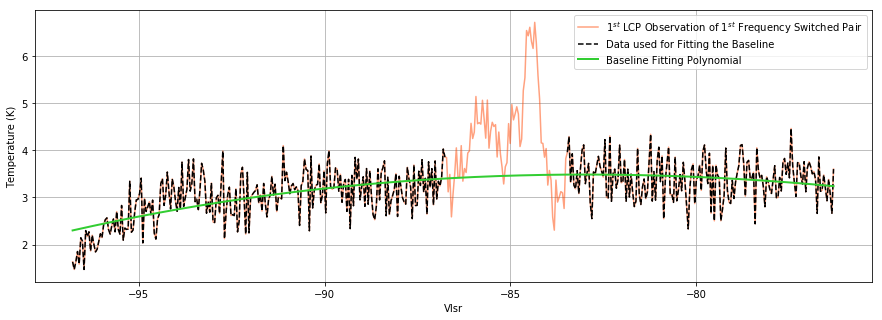

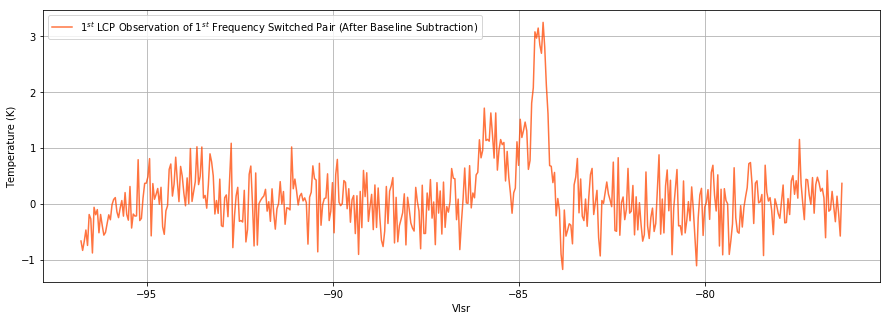

In [34]:
LCP_1_Fitted = baseline_subtraction(fitted_spectrum_1['Vlsr'], fitted_spectrum_1['LCP'], [-86.75, -83.5], 'orangered', r'$1^{st}$ LCP Observation of $1^{st}$ Frequency Switched Pair')
fitted_spectrum_1['LCP'] = LCP_1_Fitted

#### 2nd Spectrum LCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


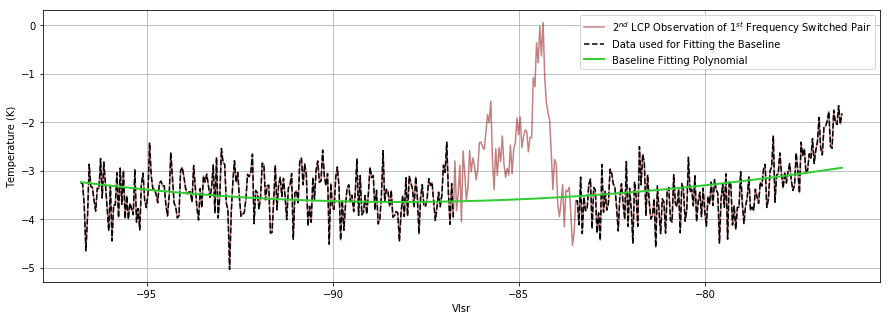

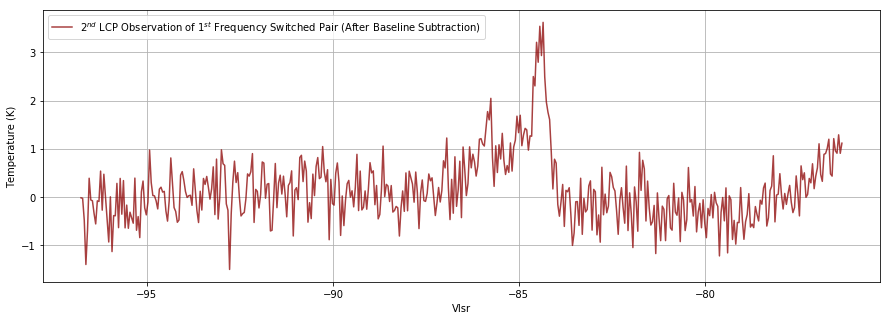

In [35]:
LCP_2_Fitted = baseline_subtraction(fitted_spectrum_2['Vlsr'], fitted_spectrum_2['LCP'], [-86.75, -83.5], 'darkred', r'$2^{nd}$ LCP Observation of $1^{st}$ Frequency Switched Pair')
fitted_spectrum_2['LCP'] = LCP_2_Fitted

#### 1st Spectrum RCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


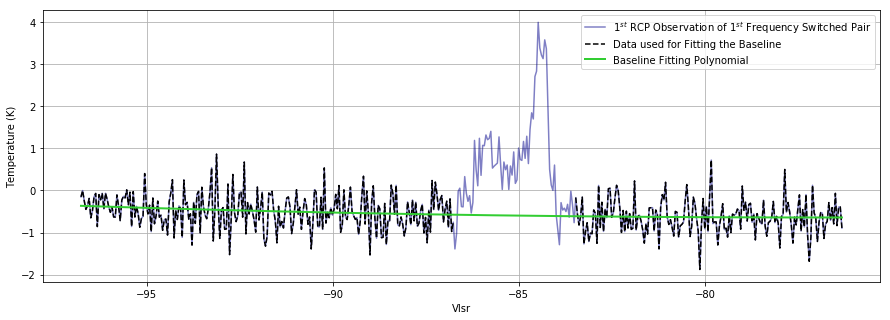

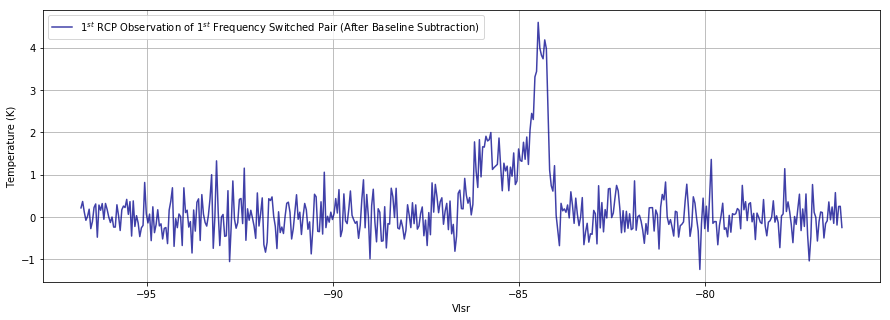

In [36]:
RCP_1_Fitted = baseline_subtraction(fitted_spectrum_1['Vlsr'], fitted_spectrum_1['RCP'], [-86.75, -83.5], 'darkblue', r'$1^{st}$ RCP Observation of $1^{st}$ Frequency Switched Pair')
fitted_spectrum_1['RCP'] = RCP_1_Fitted

#### 2nd Spectrum RCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


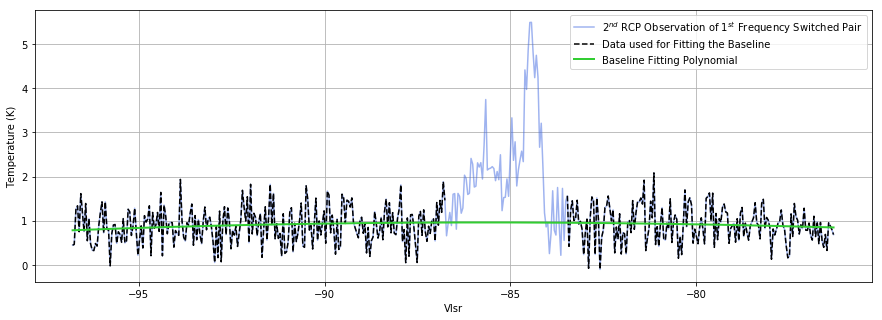

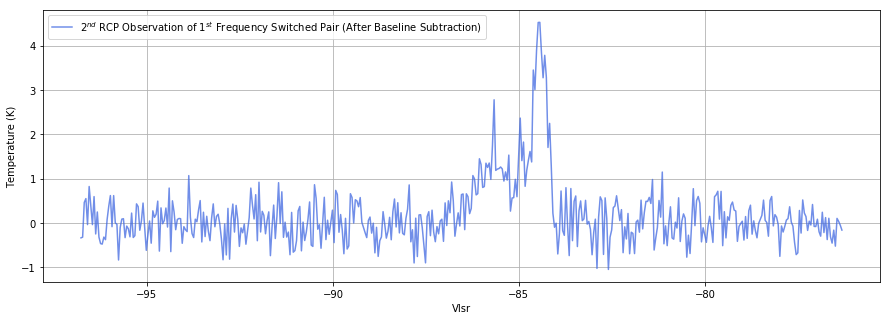

In [37]:
RCP_2_Fitted = baseline_subtraction(fitted_spectrum_2['Vlsr'], fitted_spectrum_2['RCP'], [-86.75, -83.5], 'royalblue', r'$2^{nd}$ RCP Observation of $1^{st}$ Frequency Switched Pair')
fitted_spectrum_2['RCP'] = RCP_2_Fitted

## Step 3: Calculate Time Averaged Spectrum of this Pair

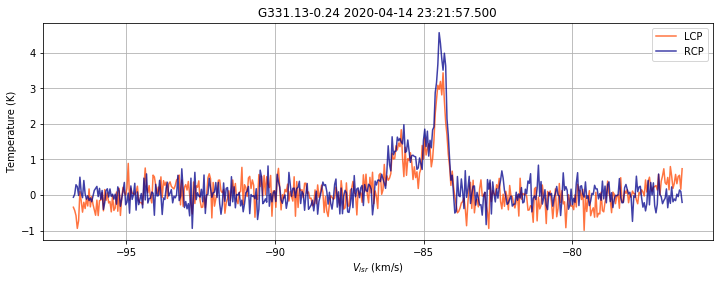

3.4341307
4.562154


In [38]:
average_spectrum_1 = time_averaged_spectrum(fitted_spectrum_1, fitted_spectrum_2)
plot_spectrum(average_spectrum_1, 'Kelvin')

print(np.max(average_spectrum_1['LCP']))
print(np.max(average_spectrum_1['RCP']))

# 2nd FS Pair Data Reduction

## Step 1: Plot Spectra

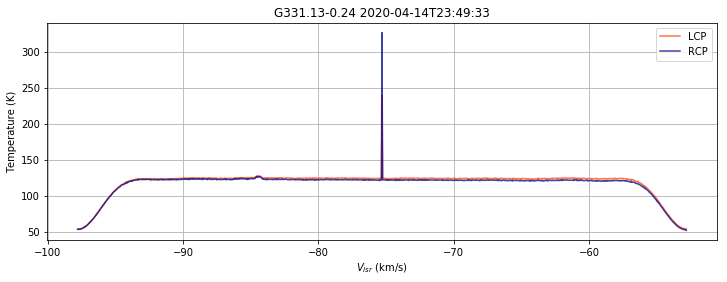

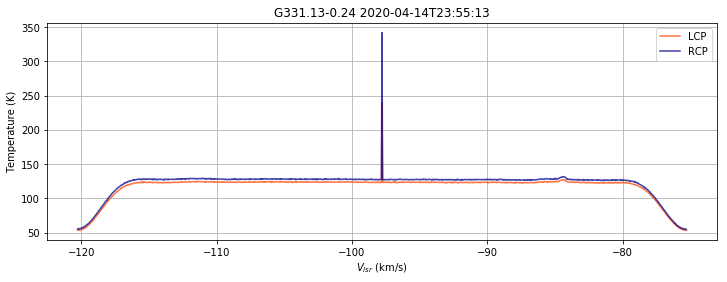

In [39]:
plot_spectrum(spectrum_3, 'Kelvin')
plot_spectrum(spectrum_4, 'Kelvin')

## Step 2: Bandpass Correction Via Frequency Switching

### Step 2 A: Find Where the Pair Overlaps

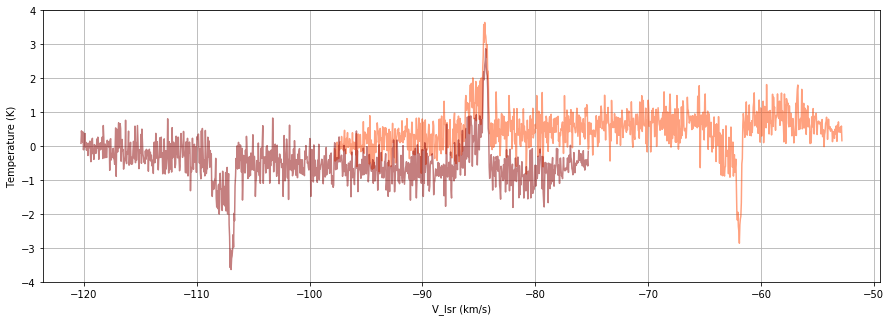

In [40]:
LCP_Overlap_Plot(spectrum_3, spectrum_4)

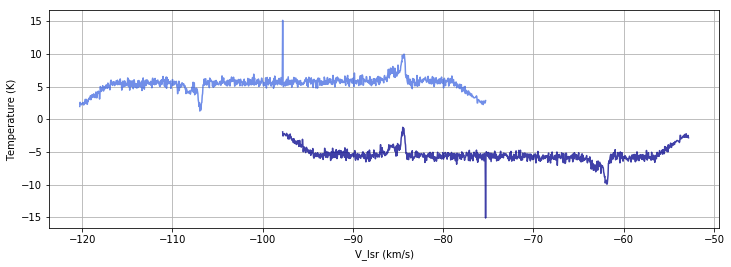

In [41]:
RCP_Overlap_Plot(spectrum_3, spectrum_4)

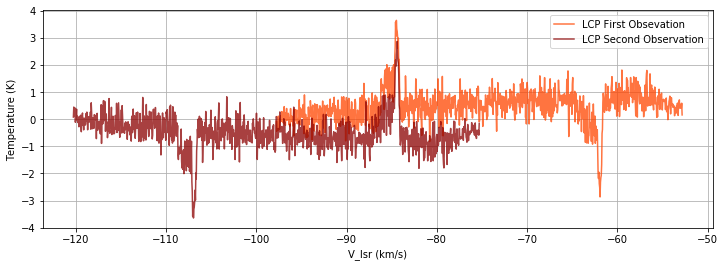

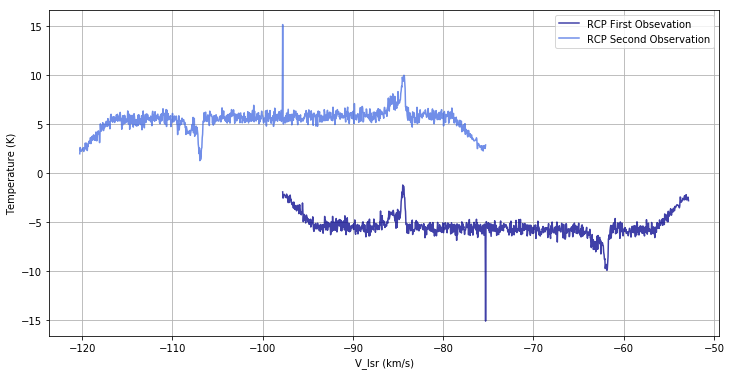

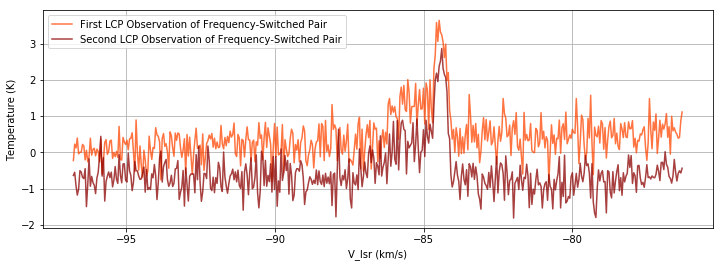

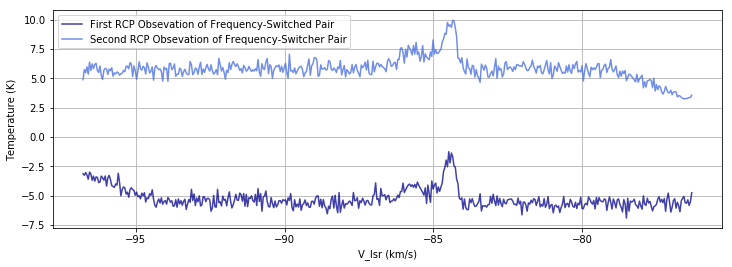

In [42]:
new_spectrum_3, new_spectrum_4 = frequency_switch(spectrum_3, spectrum_4)

# Plot LCP Spectra Overlap
# -------------------------

# Create Figure
plt.figure(figsize = (12,4))

plt.plot(new_spectrum_3['Vlsr'], new_spectrum_3['LCP'], label='First LCP Observation of Frequency-Switched Pair', color = 'orangered', alpha = 0.75)
plt.plot(new_spectrum_4['Vlsr'], new_spectrum_4['LCP'], label='Second LCP Observation of Frequency-Switched Pair', color = 'darkred', alpha = 0.75)

# Add Legend & Grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Set Labels
plt.xlabel('V_lsr (km/s)')
plt.ylabel('Temperature (K)')
plt.axis('tight')

# Show Figure
plt.show()
         
# Plot RCP Spectra Overlap
# -------------------------

# Create Figure
plt.figure(figsize = (12,4))

plt.plot(new_spectrum_3['Vlsr'], new_spectrum_3['RCP'], label='First RCP Obsevation of Frequency-Switched Pair', color = 'darkblue', alpha = 0.75)
plt.plot(new_spectrum_4['Vlsr'], new_spectrum_4['RCP'], label='Second RCP Obsevation of Frequency-Switcher Pair', color = 'royalblue', alpha = 0.75)

# Add Legend & Grid
plt.legend(loc = 'upper left')
plt.grid(True)

# Set Labels
plt.xlabel('V_lsr (km/s)')
plt.ylabel('Temperature (K)')
plt.axis('tight')

# Show Figure
plt.show()


### Step 2 B, Baseline Subtraction

In [43]:
fitted_spectrum_3 = new_spectrum_3
fitted_spectrum_4 = new_spectrum_4

#### 1st Spectrum LCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


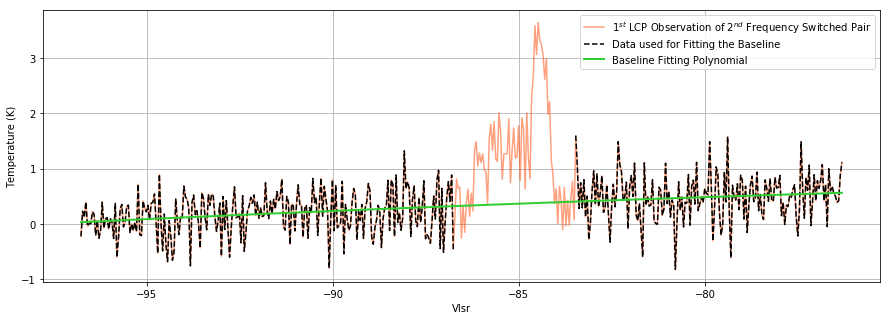

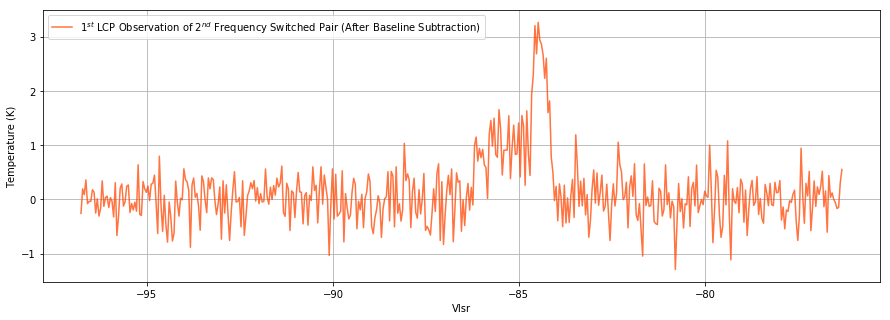

In [44]:
LCP_3_Fitted = baseline_subtraction(fitted_spectrum_3['Vlsr'], fitted_spectrum_3['LCP'], [-86.75, -83.5], 'orangered', r'$1^{st}$ LCP Observation of $2^{nd}$ Frequency Switched Pair')
fitted_spectrum_3['LCP'] = LCP_3_Fitted

#### 2nd Spectrum LCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


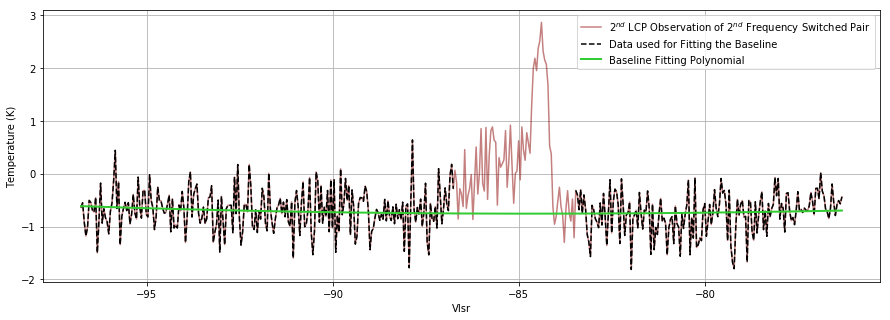

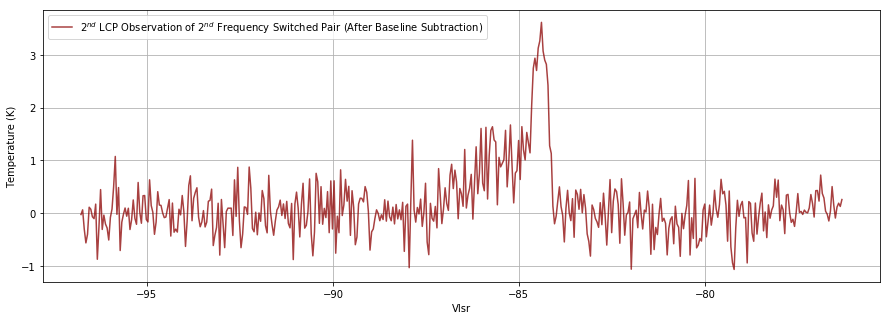

In [45]:
LCP_4_Fitted = baseline_subtraction(fitted_spectrum_4['Vlsr'], fitted_spectrum_4['LCP'], [-86.75, -83.5], 'darkred', r'$2^{nd}$ LCP Observation of $2^{nd}$ Frequency Switched Pair')
fitted_spectrum_4['LCP'] = LCP_4_Fitted

#### 1st Spectrum RCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


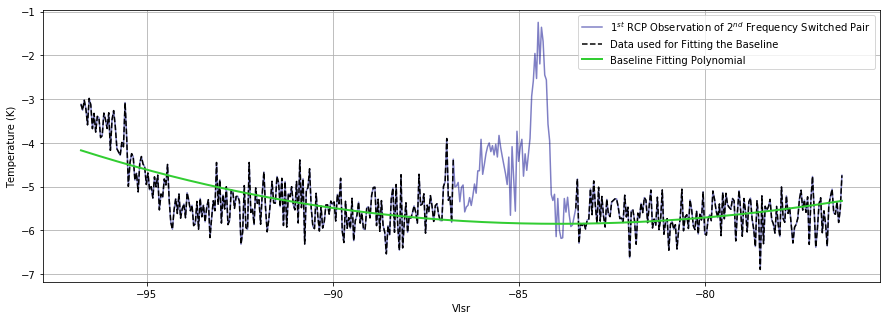

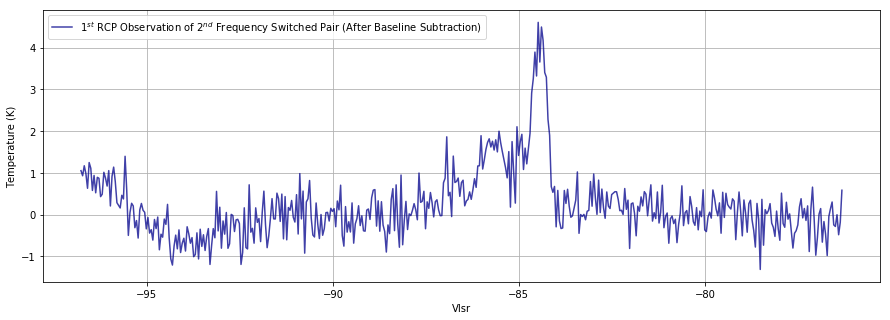

In [46]:
RCP_3_Fitted = baseline_subtraction(fitted_spectrum_3['Vlsr'], fitted_spectrum_3['RCP'], [-86.75, -83.5], 'darkblue', r'$1^{st}$ RCP Observation of $2^{nd}$ Frequency Switched Pair')
fitted_spectrum_3['RCP'] = RCP_3_Fitted

#### 2nd Spectrum RCP

c:\users\clinton\appdata\local\programs\python\python37-32\lib\site-packages\numpy\ma\extras.py:1897: RankWarning: Polyfit may be poorly conditioned
  return np.polyfit(x[not_m], y[not_m], deg, rcond, full, w, cov)


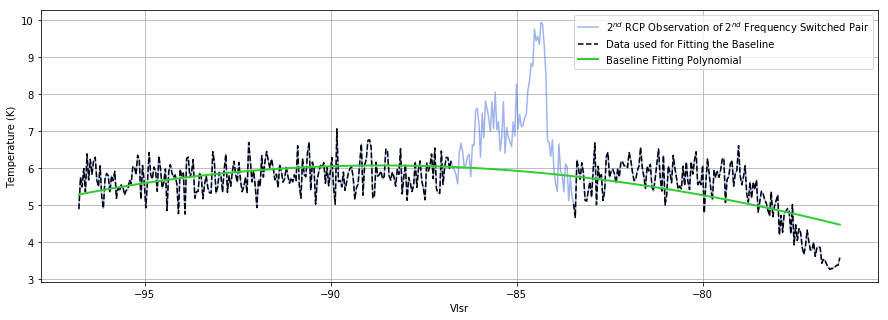

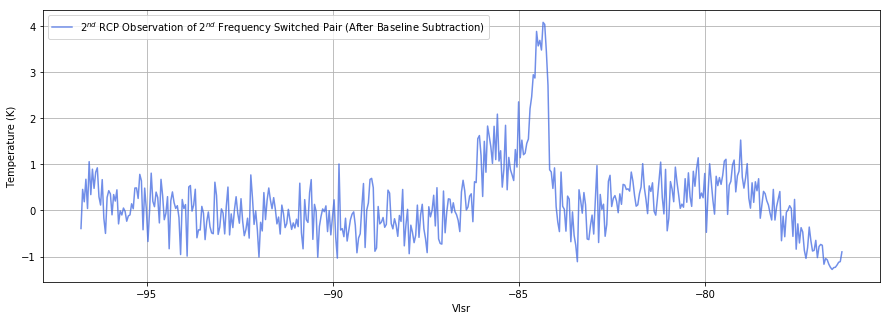

In [47]:
RCP_4_Fitted = baseline_subtraction(fitted_spectrum_4['Vlsr'], fitted_spectrum_4['RCP'], [-86.75, -83.5], 'royalblue', r'$2^{nd}$ RCP Observation of $2^{nd}$ Frequency Switched Pair')
fitted_spectrum_4['RCP'] = RCP_4_Fitted

## Step 3: Calculate Time Averaged Spectrum Of This Pair

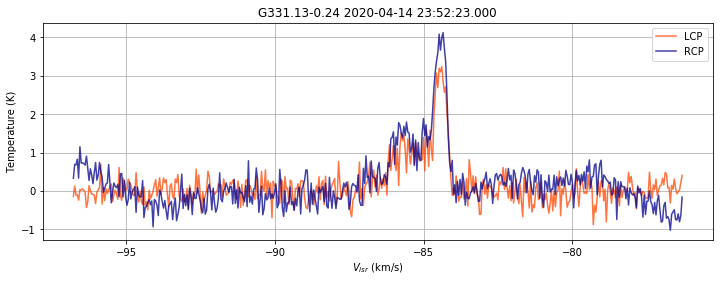

3.2402377
4.1248665


In [48]:
average_spectrum_2 = time_averaged_spectrum(fitted_spectrum_3, fitted_spectrum_4)
plot_spectrum(average_spectrum_2, 'Kelvin')

print(np.max(average_spectrum_2['LCP']))
print(np.max(average_spectrum_2['RCP']))

# PSS Conversion Factor

PSS was calculated from the Drift Scan of Virgo A

In [49]:
LCP_PSS = 6.00
RCP_PSS = 5.25

# Pointing Correction Factor

Pointing Correction was done using the same PCF as for G323: PCF = 1.1107

In [50]:
PCF = 1.1107

In [51]:
LCP_Intensity = PCF * LCP_PSS * ( (average_spectrum_1['LCP'] + average_spectrum_2['LCP'])/2.0 )
RCP_Intensity = PCF * RCP_PSS * ( (average_spectrum_1['RCP'] + average_spectrum_2['RCP'])/2.0 )

Intensity = LCP_Intensity + RCP_Intensity
date = average_spectrum_1['date']
obj = average_spectrum_1['object']
VLSR = average_spectrum_1['Vlsr']

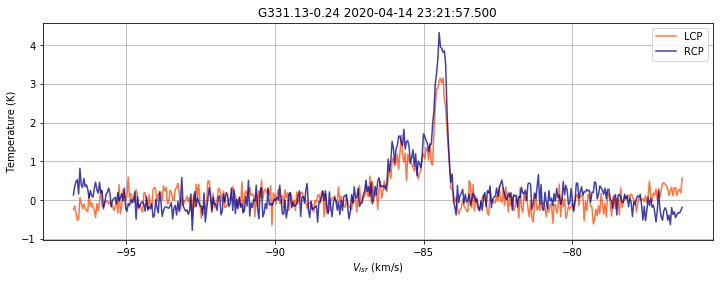

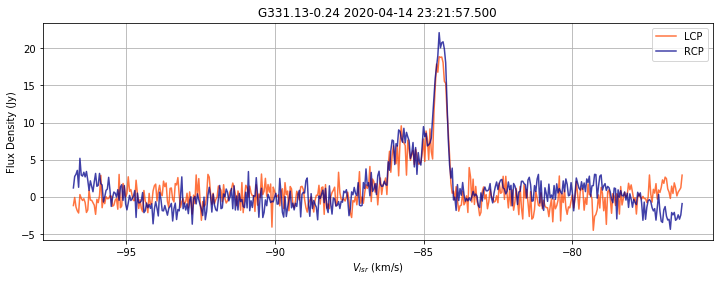

In [52]:
final_spectrum = average_spectrum_1
final_spectrum['LCP'] = (average_spectrum_1['LCP'] + average_spectrum_2['LCP'])/2.0
final_spectrum['RCP'] = (average_spectrum_1['RCP'] + average_spectrum_2['RCP'])/2.0
plot_spectrum(final_spectrum, 'Kelvin')

final_intensity_spectrum = final_spectrum
final_intensity_spectrum['LCP'] = LCP_PSS*(average_spectrum_1['LCP'] + average_spectrum_2['LCP'])/2.0
final_intensity_spectrum['RCP'] = RCP_PSS*(average_spectrum_1['RCP'] + average_spectrum_2['RCP'])/2.0
plot_spectrum(final_spectrum, 'Jansky')

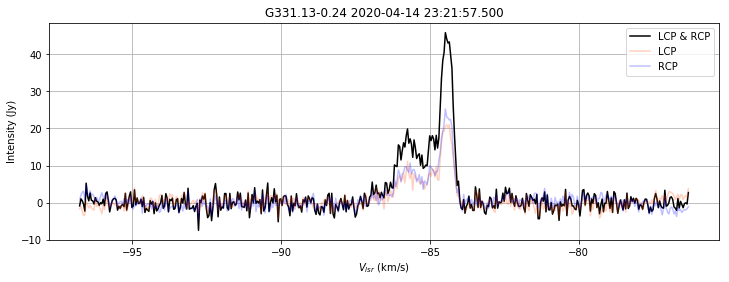

In [53]:
# Create Figure
plt.figure(figsize = (12,4))

# Plot LCP & RCP
plt.plot(VLSR, Intensity, label='LCP & RCP', color = 'black', alpha = 1)
plt.plot(VLSR, LCP_Intensity, label='LCP', color = 'orangered', alpha = 0.25)
plt.plot(VLSR, RCP_Intensity, label='RCP', color = 'blue', alpha = 0.25)

# Add Legend & Grid
plt.legend()
plt.grid(True)

# Add Title & Lables
plt.title(obj + ' ' + date)
plt.xlabel(r'$V_{lsr}$ (km/s)')
plt.ylabel('Intensity (Jy)')
plt.axis('tight')

# Show Figure
plt.show()



In [54]:
plt.style.use('default')